<a href="https://colab.research.google.com/github/datainworld/brunch/blob/master/%EB%B8%8C%EB%9F%B0%EC%B9%98_%EA%B8%B0%EC%88%A0%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 구글 colab의 시각화 차트에 한글이 표시되도록 설정
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
# github에 업로드한 2018년 서울지역 대기환경 데이터를 Pandas의 Dataframe으로 불러옴

url = 'https://media.githubusercontent.com/media/datainworld/brunch/master/datas/air_2018.csv'
df = pd.read_csv(url)
df

,datetime,msrrgn_nm,msrste_nm,pm10,pm24,pm25,o3,no2,co,so2
0,2018-01-01 00:00:00,도심권,용산구,48,36,23,0.011,0.029,0.3,0.004
1,2018-01-01 00:00:00,도심권,종로구,30,30,15,0.018,0.024,0.4,0.006
2,2018-01-01 00:00:00,도심권,중구,31,29,16,0.013,0.028,0.5,0.004
3,2018-01-01 00:00:00,서북권,은평구,36,38,16,0.011,0.018,0.6,0.003
4,2018-01-01 00:00:00,서북권,서대문구,0,0,0,0.000,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...
218595,2018-12-31 23:00:00,서남권,영등포구,38,44,28,0.007,0.036,0.8,0.005
218596,2018-12-31 23:00:00,동남권,서초구,38,34,0,0.002,0.053,0.5,0.004
218597,2018-12-31 23:00:00,동남권,송파구,39,42,25,0.002,0.056,0.7,0.004
218598,2018-12-31 23:00:00,동남권,강남구,37,37,30,0.002,0.046,0.7,0.005


In [3]:
# datetime 열을 Pandas의 datatime 타입으로 변경하면서 date_time 열 생성

df['date_time'] = pd.to_datetime(df['datetime'])
df.drop('datetime', axis=1, inplace=True)
df.tail(3)

,msrrgn_nm,msrste_nm,pm10,pm24,pm25,o3,no2,co,so2,date_time
218597,동남권,송파구,39,42,25,0.002,0.056,0.7,0.004,2018-12-31 23:00:00
218598,동남권,강남구,37,37,30,0.002,0.046,0.7,0.005,2018-12-31 23:00:00
218599,동남권,강동구,43,42,29,0.002,0.063,0.9,0.005,2018-12-31 23:00:00


In [4]:
# date_time 열을 인덱스로 대체

df.set_index('date_time', inplace=True)
df.tail(3)

,msrrgn_nm,msrste_nm,pm10,pm24,pm25,o3,no2,co,so2
date_time,,,,,,,,,
2018-12-31 23:00:00,동남권,송파구,39,42,25,0.002,0.056,0.7,0.004
2018-12-31 23:00:00,동남권,강남구,37,37,30,0.002,0.046,0.7,0.005
2018-12-31 23:00:00,동남권,강동구,43,42,29,0.002,0.063,0.9,0.005


In [5]:
# 시간대별 25개 자치구의 대기환경 평균값 산출

hour_mean = df.resample('H').mean()
hour_mean

,pm10,pm24,pm25,o3,no2,co,so2
date_time,,,,,,,
2018-01-01 00:00:00,33.36,35.00,16.88,0.01588,0.02224,0.420,0.00476
2018-01-01 01:00:00,32.68,33.80,16.56,0.01616,0.02164,0.432,0.00460
2018-01-01 02:00:00,32.48,33.00,16.44,0.01348,0.02436,0.456,0.00472
2018-01-01 03:00:00,31.32,32.40,17.08,0.01056,0.02696,0.492,0.00468
2018-01-01 04:00:00,31.16,32.08,17.32,0.00932,0.02788,0.484,0.00464
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,36.44,44.28,20.08,0.00784,0.04404,0.600,0.00436
2018-12-31 20:00:00,36.12,42.92,21.08,0.00628,0.04568,0.668,0.00464
2018-12-31 21:00:00,38.52,42.44,22.96,0.00532,0.04752,0.704,0.00480


In [6]:
mean = hour_mean.pm25.mean()
median = hour_mean.pm25.median()
mode = hour_mean.pm25.mode()

print("평균값 : ", mean, "\n"
      "중위값 : ", median, "\n"
      "최빈값 : ", mode)


평균값 :  22.142946020128015 
중위값 :  18.2 
최빈값 :  0    17.32
dtype: float64


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


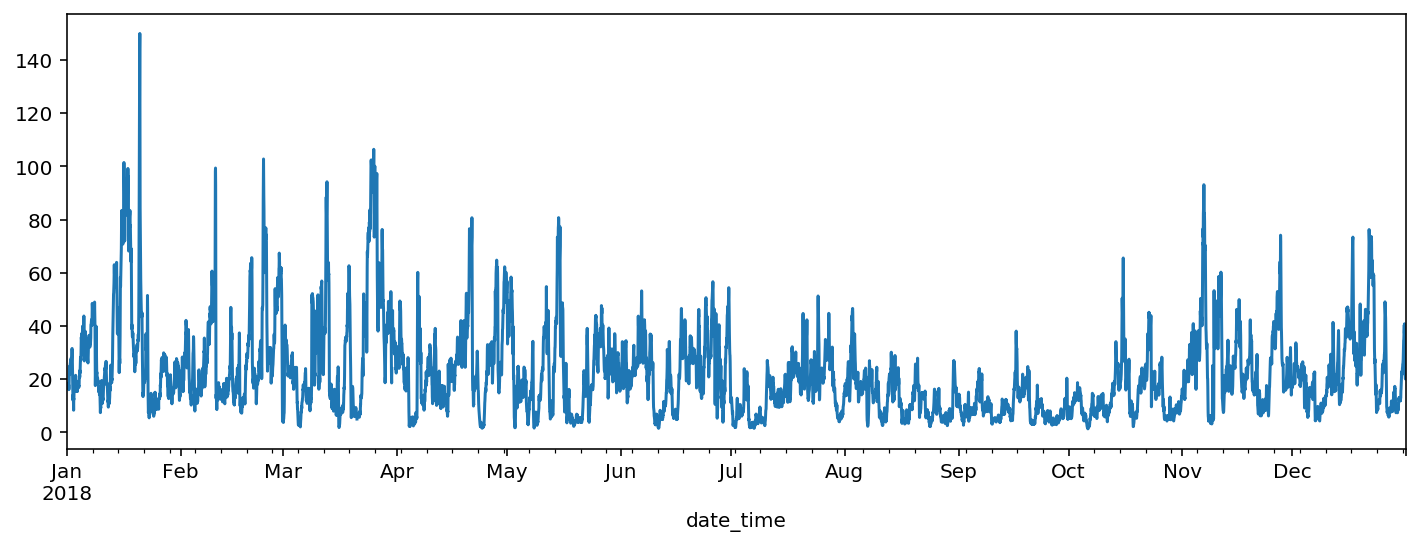

In [7]:
# pm25의 시간대별 평균값으로 선그래프로 시각화

hour_mean.pm25.plot(figsize=(12,4))

In [8]:
# 데이터 범위를 산출하기 위하여 null 값을 제외하고 소팅을 한다.

hour_mean[hour_mean.pm25.notnull()].pm25.sort_values()

date_time
2018-10-06 06:00:00      1.36
2018-10-06 05:00:00      1.40
2018-06-11 06:00:00      1.56
2018-04-24 05:00:00      1.64
2018-10-06 04:00:00      1.64
                        ...  
2018-01-20 22:00:00    110.52
2018-01-20 18:00:00    116.48
2018-01-20 19:00:00    131.80
2018-01-20 20:00:00    144.04
2018-01-20 21:00:00    149.92
Name: pm25, Length: 8744, dtype: float64

In [9]:
# 초미세먼지 농도 값의 표준편차 산출

hour_mean.pm25.std()

16.779829116673934

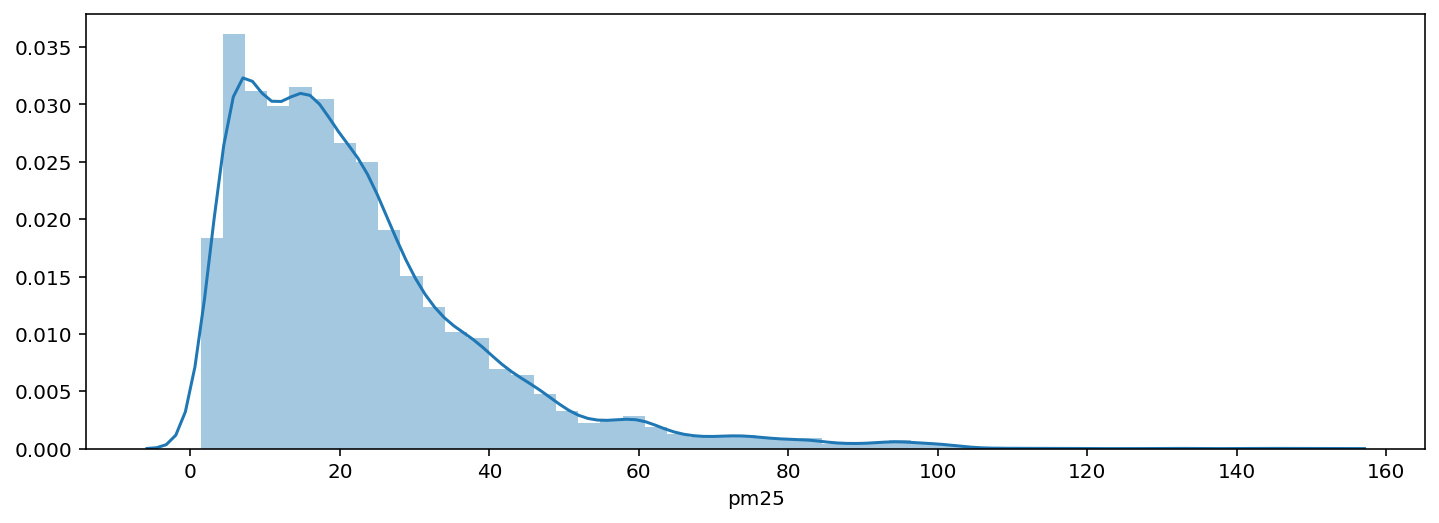

In [10]:
# (히스토그램+KDE)로 연간 초미세먼지 농도값 분포 시각화

fig, ax = plt.subplots(figsize=(12,4))
sns.distplot(hour_mean.pm25)

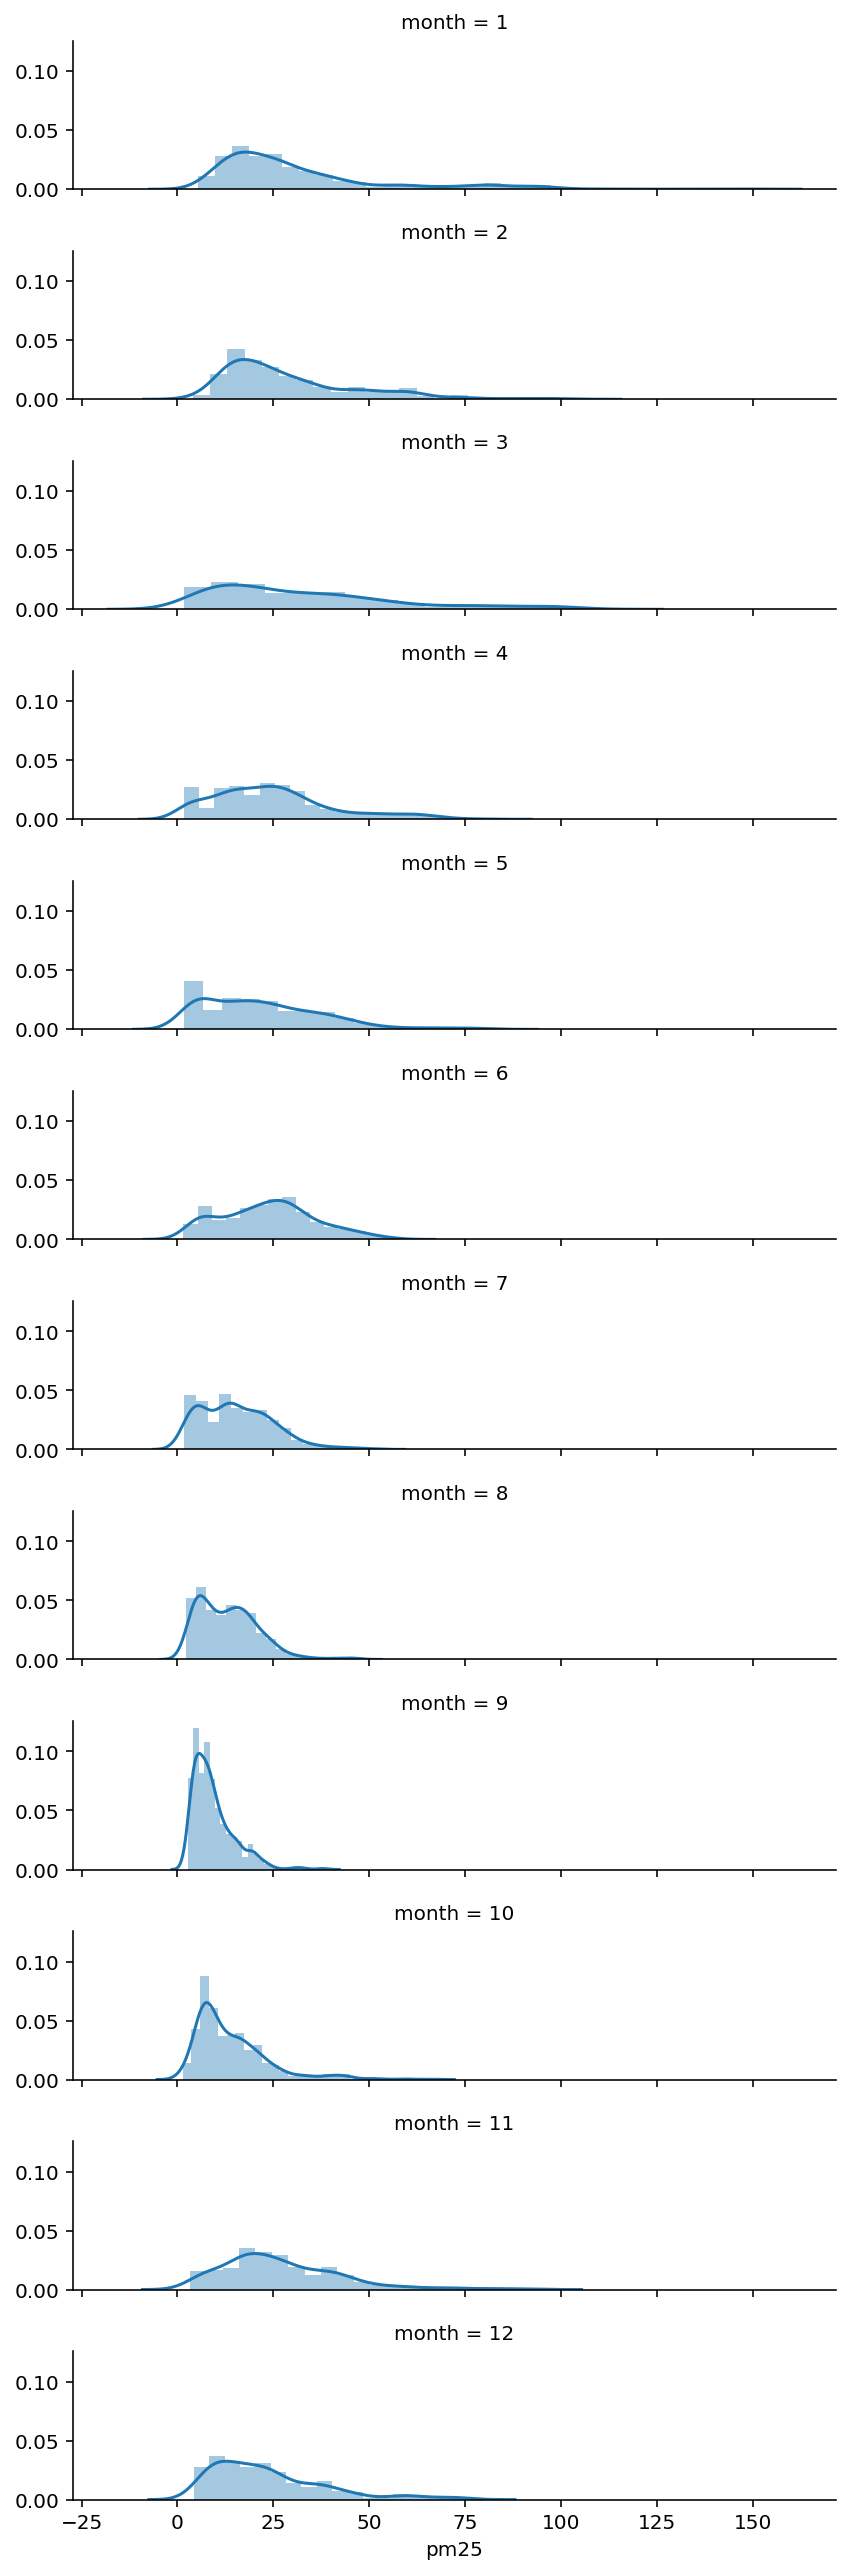

In [11]:
# (히스토그램+KDE)로 월별 초미세먼지 농도값 분포 시각화

hour_mean['month'] = hour_mean.index.month
g = sns.FacetGrid(hour_mean, row='month', height=1.5, aspect=4)
g.map(sns.distplot, 'pm25')

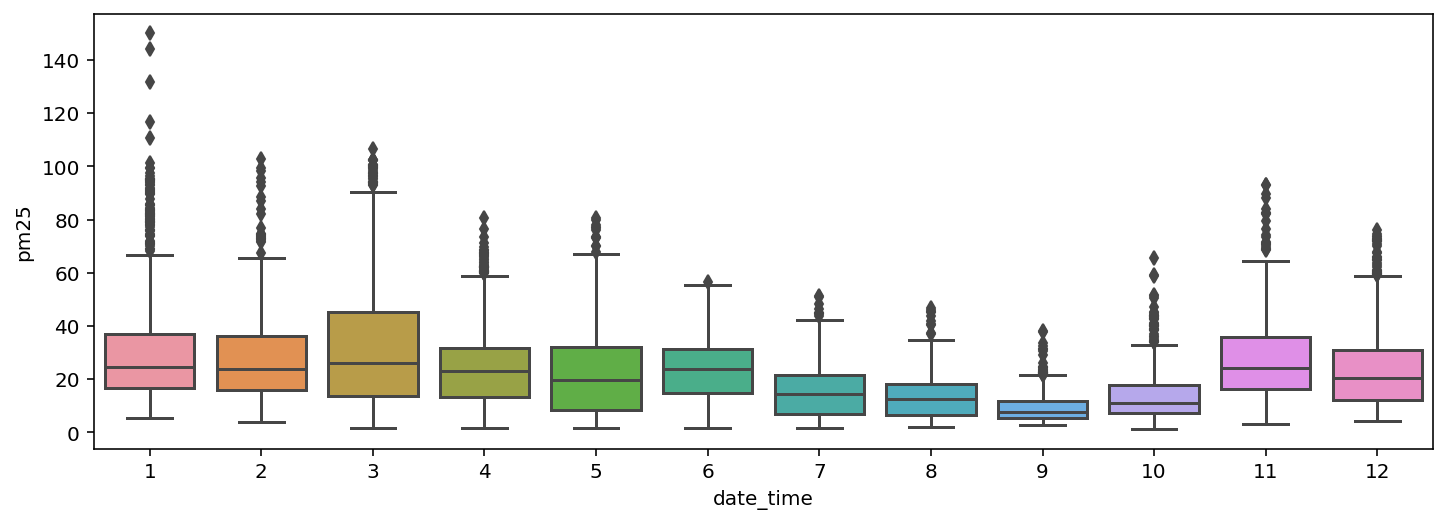

In [12]:
# 박스플롯으로 월별 초미세먼지 농도값 분포 시각화

fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x=hour_mean.index.month, y='pm25', data=hour_mean)

In [13]:
hour_mean.loc['2018-5-1' : '2018-05-02'].shape

(48, 8)